# XGBOOST MODEL

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time



In [8]:
df = pd.read_csv("TSLA.csv")
df=df[["Close"]].copy()
df["target"] = df.Close.shift(-1)
df.dropna(inplace=True)
df.head(5)

,Close,target
0,48.174000,48.938000
1,48.938000,48.625999
2,48.625999,46.605999
3,46.605999,46.285999
4,46.285999,47.543999


In [9]:
def train_test_split(data, percentage):
    data=data.values
    n=int(len(data)* (1-percentage))
    return data[:n], data[n:]

In [10]:
train, test = train_test_split(df, 0.2)

In [11]:
X=train[:, : -1]
y=train[:, -1]

In [12]:
from xgboost import XGBRegressor

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1)
model.fit(X,y)

X shape: (510, 1)
y shape: (510,)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
test[0]

array([793.60998535, 785.48999023])

In [14]:
val = np.array(test[0,0]).reshape(1,-1)

pred=model.predict(val)
print(pred[0])

808.6418


In [15]:
def xgb_predict(train, val):
    train = np.array(train)
    X,y =train[:,: -1], train[:, -1]
    model=XGBRegressor(objective="reg:squarederror", n_estimators=1000)
    model.fit(X,y)

    val=np.array(val).reshape(1,-1)
    pred = model.predict(val)
    return pred[0]

In [16]:
xgb_predict(train, test[0,0])

np.float32(808.68335)

In [17]:
from sklearn.metrics import root_mean_squared_error

def validate(data, perc):
    predictions =[]

    train,test = train_test_split(data,perc)

    test = np.array(test)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred =xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error =root_mean_squared_error(test[:, -1], predictions)

    return error, test[:, -1],predictions

In [18]:
%%time
df = df.dropna()
rmse,y, pred = validate(df, 0.3)

print(rmse)

45.5811505825197
CPU times: total: 29min 24s
Wall time: 2min 16s


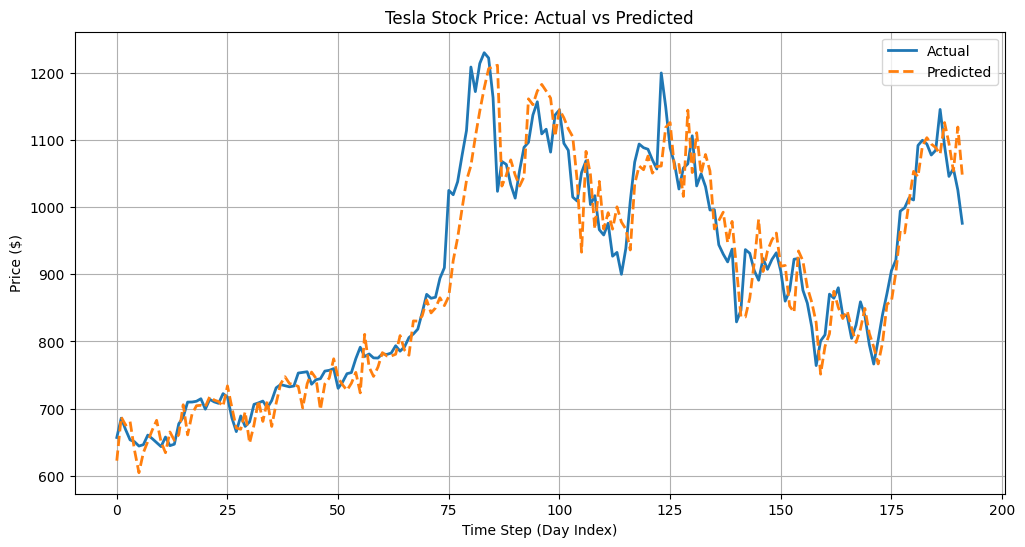

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y, label="Actual", linewidth=2)
plt.plot(pred, label="Predicted", linestyle="--", linewidth=2)
plt.title("Tesla Stock Price: Actual vs Predicted")
plt.xlabel("Time Step (Day Index)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()